In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [2]:
# Load the generated data
df = pd.read_csv('hardware_monitor_data.csv', names=[
    'timestamp', 'cpu_temperature', 'cpu_usage', 'cpu_load', 'memory_usage', 'battery_level', 'cpu_power'])

In [3]:
# Preprocess data if needed (e.g., convert timestamps to datetime)
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [4]:
# Anomaly Detection using Isolation Forest
isolation_forest = IsolationForest(n_estimators=100, contamination=0.05)
df['anomaly'] = isolation_forest.fit_predict(df[['cpu_temperature', 'cpu_usage', 'cpu_load', 'memory_usage', 'cpu_power']])

c:\Users\Shrinjita Paul\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


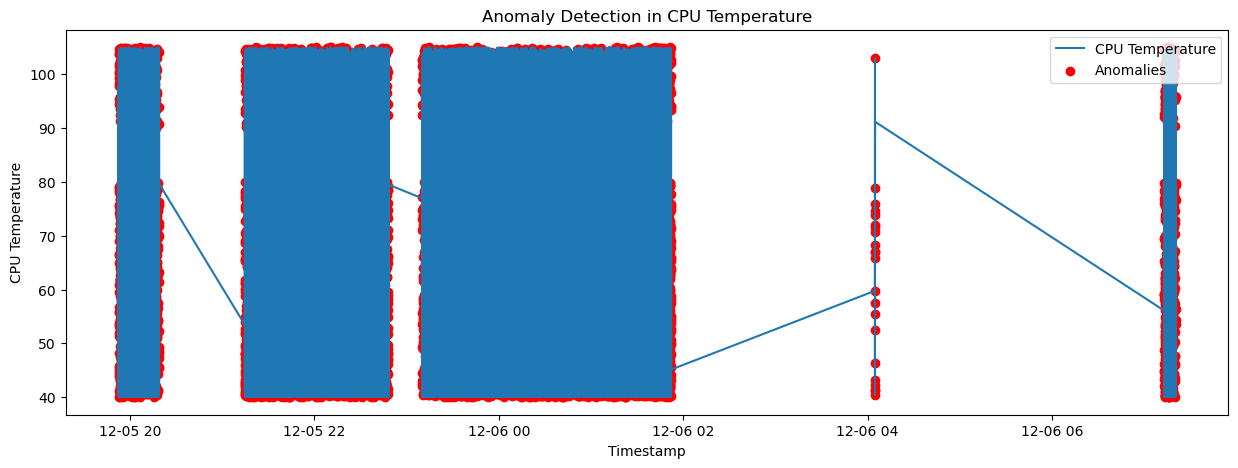

In [5]:
# Visualize Anomalies
plt.figure(figsize=(15, 5))
plt.plot(df['timestamp'], df['cpu_temperature'], label='CPU Temperature')
plt.scatter(df['timestamp'][df['anomaly'] == -1], df['cpu_temperature'][df['anomaly'] == -1], color='red', label='Anomalies')
plt.legend()
plt.title('Anomaly Detection in CPU Temperature')
plt.xlabel('Timestamp')
plt.ylabel('CPU Temperature')
plt.show()
